In [1]:
import threading
from time import sleep

import ipywidgets as widgets
from IPython.display import display, clear_output 
import numpy as np
import matplotlib.pyplot as plt
out = widgets.Output(layout={'border': '1px solid black'})
xlength, ylength = 5, 5
iterations = 4
board = np.round(np.random.rand(xlength,ylength))
neighbor_adding_tensor = np.zeros((ylength,xlength,ylength,xlength))
for i in range(ylength):
    for j in range(xlength):
        for k in range(i-1,i+2):
            for l in range(j-1,j+2):
                if not (k == i and j == l) and 0 <= k < ylength and 0 <= l < xlength:
                    neighbor_adding_tensor[i, j, k, l] = int(1)


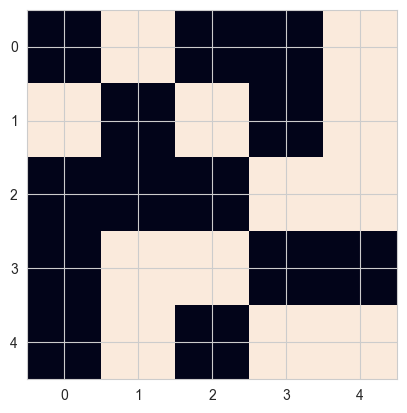

In [2]:
plt.imshow(board)

In [3]:
def new_gen(_board):
    neighbors = (_board*neighbor_adding_tensor).sum(axis=(2,3))
    return ((neighbors == 3) | ((neighbors == 2) & (_board==1))).astype(int)


In [4]:
@out.capture()
def on_button_clicked(b):
    global board
    #out.clear_output()
    print("test")
    board = new_gen(board)
    plt.imshow(board)
    plt.show()


In [5]:
display(out)
for i in range(iterations):
    on_button_clicked(None)
    sleep(1)


Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…